# Perkenalan :
- Nama : Dimas Liu
- Batch : 001

# Library Import :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_percentage_error, make_scorer, r2_score
from statsmodels.tsa.stattools import adfuller

In [3]:
plt.style.use('ggplot')

# Data Loading :

In [4]:
df = pd.read_csv('all_breakdown.csv', parse_dates=['TIMESTAMP'])
df = df.fillna(method='ffill')

In [5]:
df.head()

TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  SOLAR  \
0 2011-07-21 00:00:00   177.0    372.0       984.0   1.0        516.0    0.0   
1 2011-07-21 01:00:00   176.0    373.0       984.0   2.0        509.0    0.0   
2 2011-07-21 02:00:00   177.0    371.0       985.0   3.0        506.0    0.0   
3 2011-07-21 03:00:00   177.0    374.0       985.0   4.0        504.0    0.0   
4 2011-07-21 04:00:00   177.0    377.0       984.0   5.0        508.0    0.0   

   SOLAR PV  SOLAR THERMAL  WIND TOTAL  
0       NaN            NaN      1607.0  
1       NaN            NaN      1619.0  
2       NaN            NaN      1660.0  
3       NaN            NaN      1633.0  
4       NaN            NaN      1520.0

# Data Cleaning :

In [6]:
df.dtypes

TIMESTAMP        datetime64[ns]
BIOGAS                  float64
BIOMASS                 float64
GEOTHERMAL              float64
Hour                    float64
SMALL HYDRO             float64
SOLAR                   float64
SOLAR PV                float64
SOLAR THERMAL           float64
WIND TOTAL              float64
dtype: object

In [7]:
df.isna().sum()

TIMESTAMP         0
BIOGAS            0
BIOMASS           0
GEOTHERMAL        0
Hour              0
SMALL HYDRO       0
SOLAR             0
SOLAR PV         24
SOLAR THERMAL    24
WIND TOTAL        0
dtype: int64

In [8]:
df = df.dropna()

# EDA :

In [9]:
df.loc[(df['SOLAR THERMAL'] != 0.0) & (df['SOLAR PV'] != 0.0)].head()

TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  SOLAR  \
31 2013-05-29 07:00:00   200.0    312.0       839.0   8.0        353.0    0.0   
32 2013-05-29 08:00:00   202.0    308.0       836.0   9.0        357.0    0.0   
33 2013-05-29 09:00:00   200.0    314.0       785.0  10.0        361.0    0.0   
34 2013-05-29 10:00:00   199.0    325.0       805.0  11.0        360.0    0.0   
35 2013-05-29 11:00:00   201.0    323.0       825.0  12.0        359.0    0.0   

    SOLAR PV  SOLAR THERMAL  WIND TOTAL  
31     436.0           34.0      2801.0  
32     857.0          220.0      2715.0  
33    1202.0          308.0      2461.0  
34    1442.0          316.0      2350.0  
35    1528.0          289.0      2327.0

In [10]:
newtime = df.loc[df['TIMESTAMP'] > '2013-05-29 00:00:00']
newtime

TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
25    2013-05-29 01:00:00   210.0    323.0       895.0   2.0        341.0   
26    2013-05-29 02:00:00   210.0    326.0       896.0   3.0        342.0   
27    2013-05-29 03:00:00   210.0    322.0       896.0   4.0        342.0   
28    2013-05-29 04:00:00   209.0    313.0       891.0   5.0        345.0   
29    2013-05-29 05:00:00   208.0    308.0       840.0   6.0        352.0   
...                   ...     ...      ...         ...   ...          ...   
67555 2017-02-13 19:00:00   186.0    175.0       882.0  20.0        470.0   
67556 2017-02-13 20:00:00   180.0    174.0       883.0  21.0        468.0   
67557 2017-02-13 21:00:00   186.0    171.0       883.0  22.0        432.0   
67558 2017-02-13 22:00:00   182.0    169.0       883.0  23.0        426.0   
67559 2017-02-13 23:00:00   185.0    169.0       883.0  24.0        386.0   

       SOLAR  SOLAR PV  SOLAR THERMAL  WIND TOTAL  
25       0.0       0.0            0.0      3268.0  
26       0.0       0.0            0.0      3202.0  
27       0.0       0.0            0.0      3007.0  
28       0.0       2.0            0.0      2563.0  
29       0.0       4.0            0.0      2290.0  
...      ...       ...            ...         ...  
67555    0.0       0.0            0.0       364.0  
67556    0.0       0.0            0.0       347.0  
67557    0.0       0.0            0.0       316.0  
67558    0.0       0.0            0.0       346.0  
67559    0.0       0.0            0.0       281.0  

[40559 rows x 10 columns]

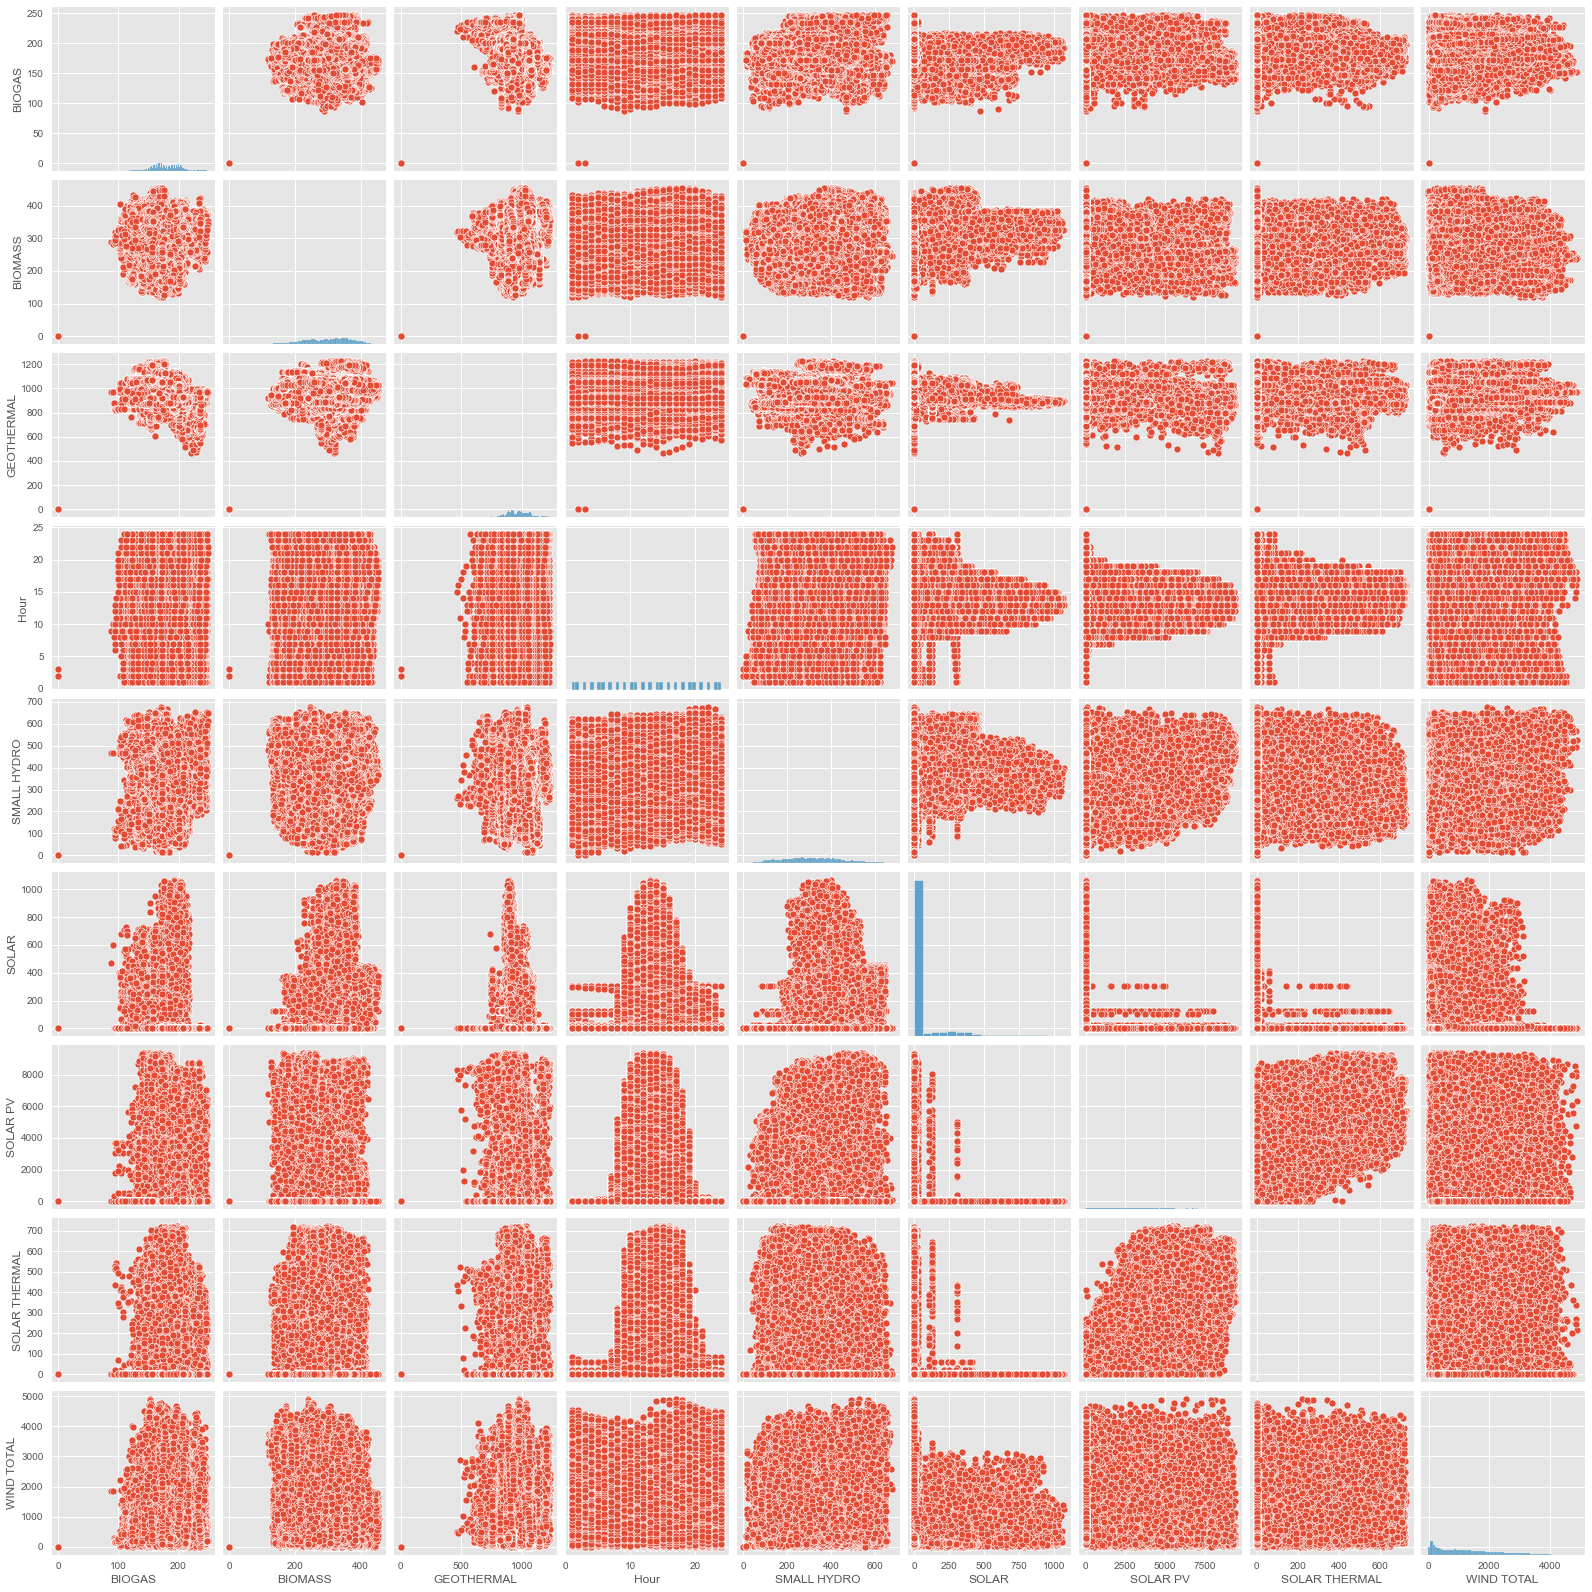

In [11]:
sns.pairplot(df)

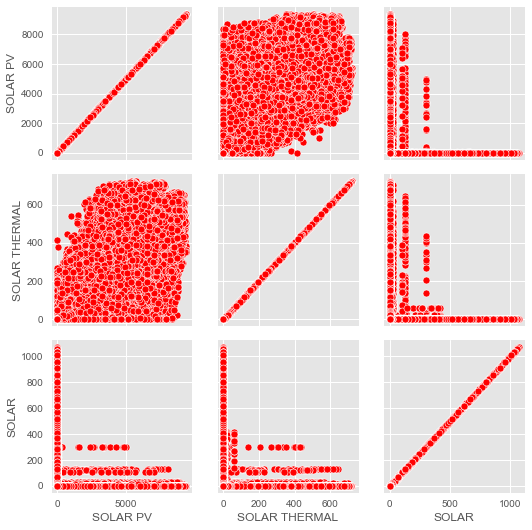

In [12]:
g = sns.PairGrid(df, vars=['SOLAR PV', 'SOLAR THERMAL', 'SOLAR'])
g.map(sns.scatterplot, color='red');

In [13]:
df.describe().transpose()

count         mean          std   min     25%     50%  \
BIOGAS         67560.0   178.977402    21.977494   0.0  163.00   178.0   
BIOMASS        67560.0   303.205968    63.517249   0.0  253.00   310.0   
GEOTHERMAL     67560.0   958.100556    82.694977   0.0  899.00   963.0   
Hour           67560.0    12.500000     6.922238   1.0    6.75    12.5   
SMALL HYDRO    67560.0   314.130842   130.424056   0.0  214.00   309.0   
SOLAR          67560.0    55.444071   152.088077   0.0    0.00     0.0   
SOLAR PV       67560.0  1094.889935  2098.629073   0.0    0.00     0.0   
SOLAR THERMAL  67560.0    77.975207   163.509573   0.0    0.00     0.0   
WIND TOTAL     67560.0  1286.491547  1037.875708 -21.0  368.00  1072.0   

                   75%     max  
BIOGAS          196.00   248.0  
BIOMASS         354.00   455.0  
GEOTHERMAL     1019.00  1230.0  
Hour             18.25    24.0  
SMALL HYDRO     407.00   678.0  
SOLAR             0.00  1069.0  
SOLAR PV       1138.25  9373.0  
SOLAR THERMAL    21.00   725.0  
WIND TOTAL     1976.00  4914.0

Dari Describe di atas, kita bisa melihat beberapa barang;
- Dari segi rata-rata, tenaga angin menghasilkan energi tertinggi.
- SOLAR PV terlihat tidak stabil, dari nilai standar deviasinya yang tidak sesuai dengan rata-ratanya.

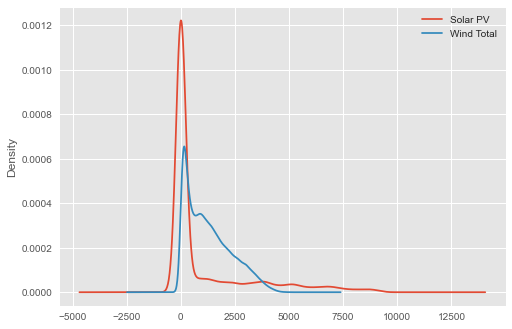

In [14]:
df['SOLAR PV'].plot.kde(label='Solar PV'), df['WIND TOTAL'].plot.kde(label='Wind Total')
plt.legend();

# Analisis per-jamnya setiap sektor mendapatkan listrik :

In [15]:
hour = newtime

In [16]:
hour['Hour'].value_counts()

4.0     1690
8.0     1690
13.0    1690
12.0    1690
10.0    1690
11.0    1690
17.0    1690
18.0    1690
6.0     1690
3.0     1690
14.0    1690
23.0    1690
21.0    1690
19.0    1690
20.0    1690
9.0     1690
5.0     1690
15.0    1690
2.0     1690
22.0    1690
24.0    1690
7.0     1690
16.0    1690
1.0     1689
Name: Hour, dtype: int64

In [17]:
hour = hour.set_index('TIMESTAMP')

In [18]:
hour['BIOGAS'] = hour['BIOGAS'] / hour['Hour']
hour['BIOMASS'] = hour['BIOMASS'] / hour['Hour']
hour['GEOTHERMAL'] = hour['GEOTHERMAL'] / hour['Hour']
hour['SMALL HYDRO'] = hour['SMALL HYDRO'] / hour['Hour']
hour['SOLAR'] = hour['SOLAR'] / hour['Hour']
hour['SOLAR PV'] = hour['SOLAR PV'] / hour['Hour']
hour['SOLAR THERMAL'] = hour['SOLAR THERMAL'] / hour['Hour']
hour['WIND TOTAL'] = hour['WIND TOTAL'] / hour['Hour']

In [19]:
del hour['Hour']

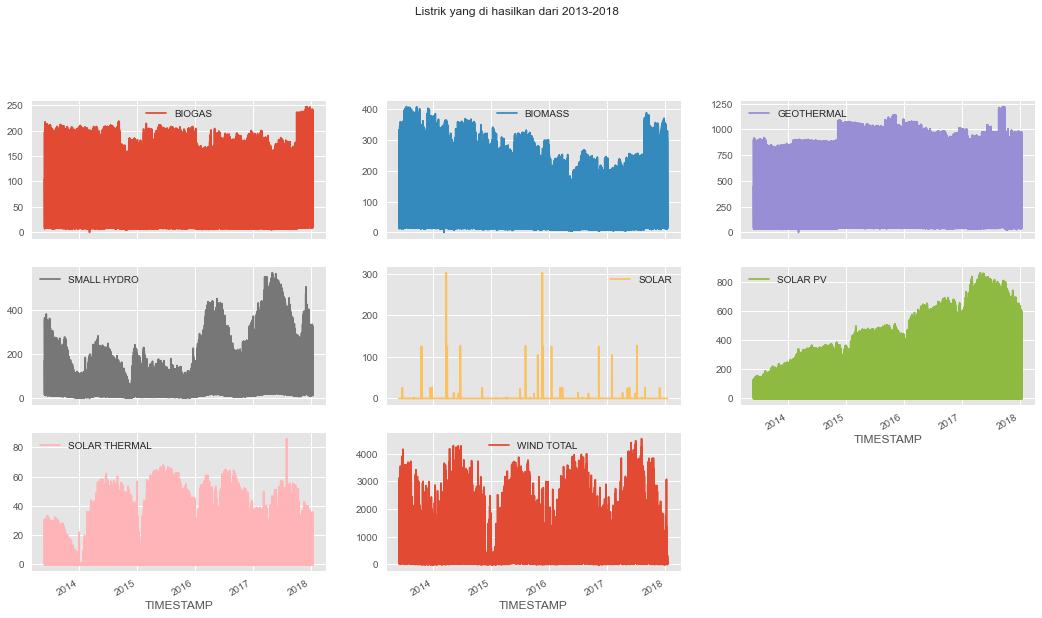

In [20]:
hour.plot(subplots=True, layout=(4,3), figsize=(18,13), title='Listrik yang di hasilkan dari 2013-2018');

# Apakah benar kalau Wind Total menghasilkan energi tertinggi ?

In [21]:
analysis = df
analysis = analysis.set_index('TIMESTAMP')

In [22]:
data = df
data = data.set_index('TIMESTAMP')

# Kenapa di logaritma ?
- logaritma di sini digunakan untuk menstabilkan varians dari nilai setiap energi.
- Seperti yang di ketahui, sektor green energy sangat fluktuatif (di karenakan faktor dari cuaca, suhu, iklim, dll).

In [23]:
analysis['SOLAR'] = np.log(analysis['SOLAR'])
analysis['BIOMASS'] = np.log(analysis['BIOMASS'])
analysis['GEOTHERMAL'] = np.log(analysis['GEOTHERMAL'])
analysis['SMALL HYDRO'] = np.log(analysis['SMALL HYDRO'])
analysis['SOLAR THERMAL'] = np.log(analysis['SOLAR THERMAL'])
analysis['SOLAR PV'] = np.log(analysis['SOLAR PV'])
analysis['WIND TOTAL'] = np.log(analysis['WIND TOTAL'])
analysis['BIOGAS'] = np.log(analysis['BIOGAS'])

/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


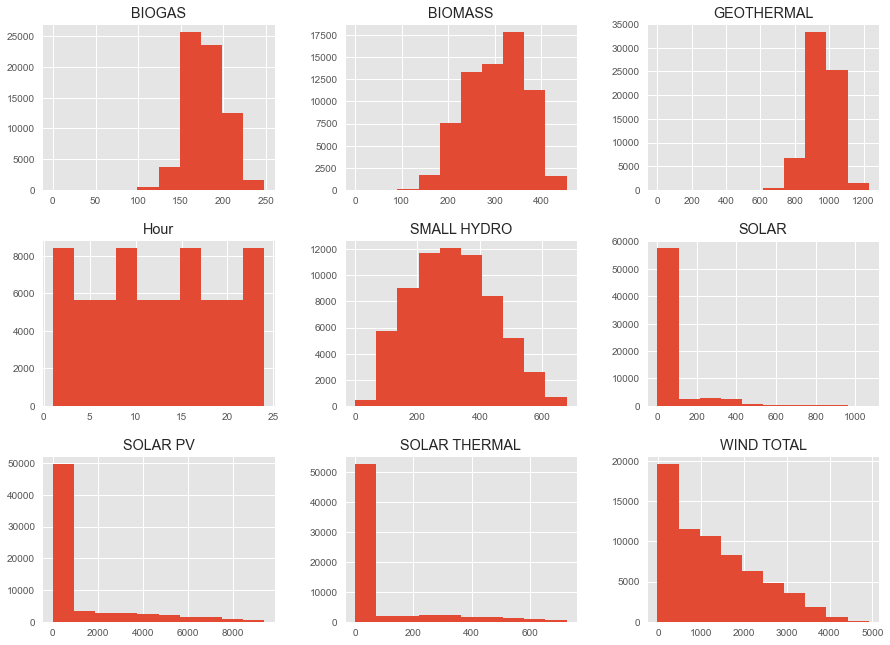

In [24]:
data.hist(layout=(3,3), figsize=(15,11));

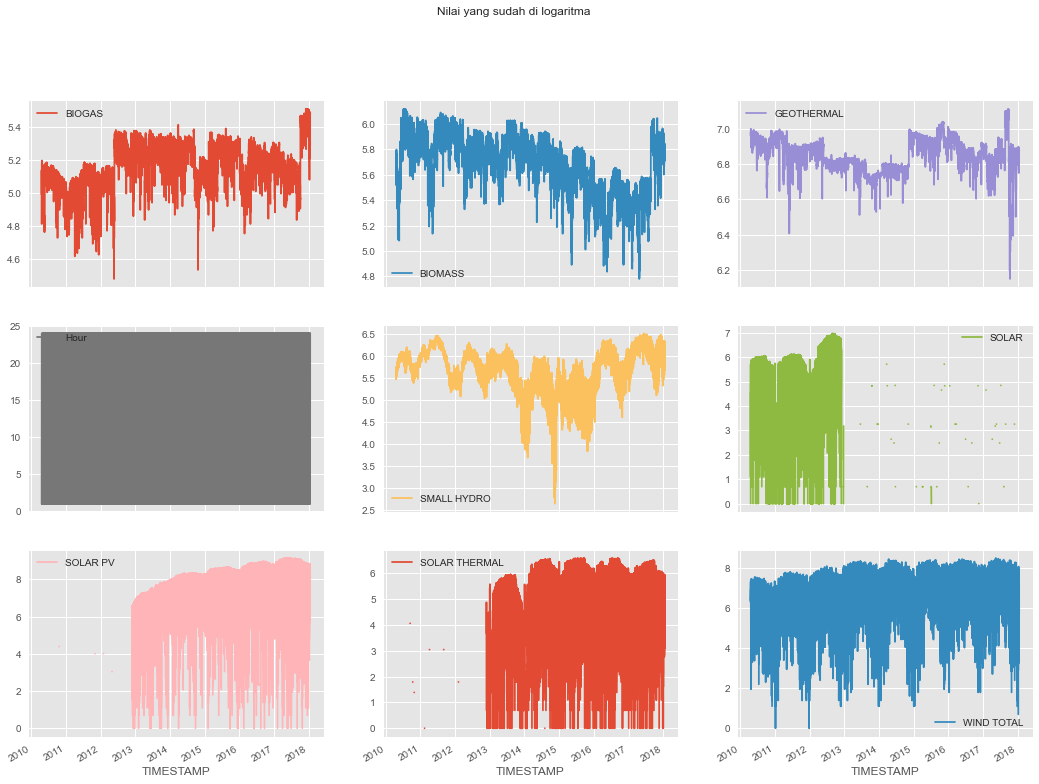

In [25]:
analysis.plot(subplots=True, layout=(3,3), figsize=(18,13), title='Nilai yang sudah di logaritma');

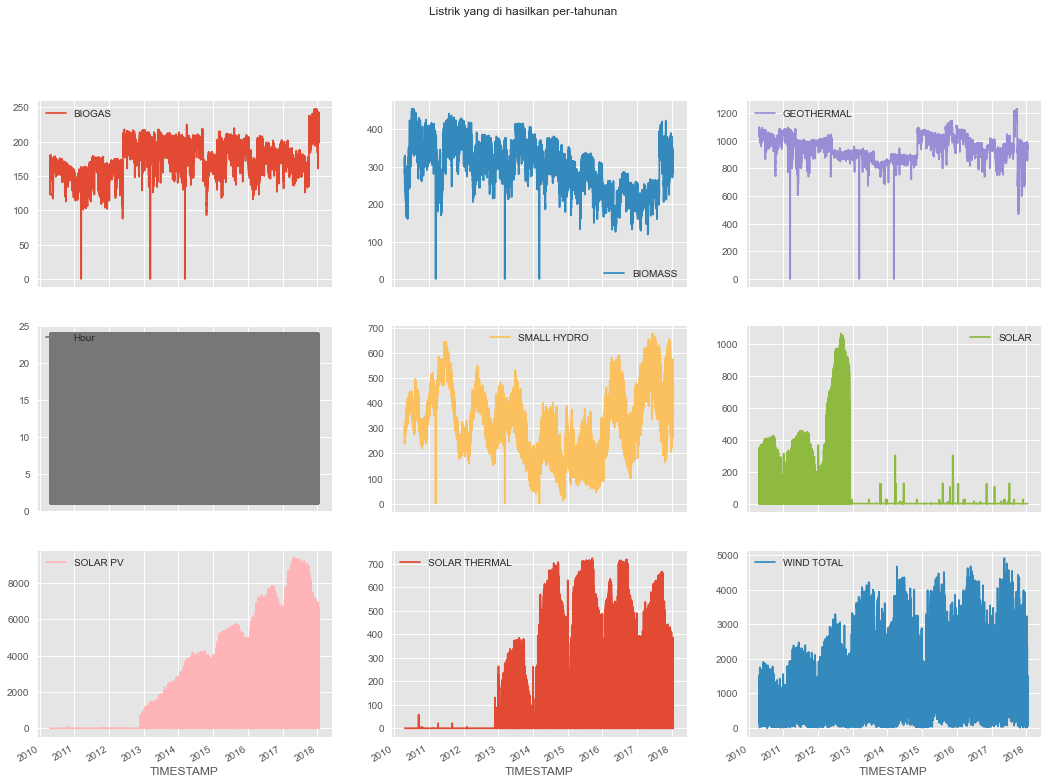

In [26]:
data.plot(subplots=True, layout=(3,3), figsize=(18,13), title='Listrik yang di hasilkan per-tahunan');

### Terlihat dari figur di atas kalau Solar sudah mulai di tinggalkan dan mulai beralih ke Solar PV dan Solar Thermal.

### Mengambil data di atas tahun 2013, dikarenakan dunia Solar mulai bergerak ke sektor Solar PV dan Solar Thermal.

In [24]:
df = df.set_index('TIMESTAMP')

In [27]:
df['TOTAL'] = df['BIOGAS'] + df['BIOMASS'] + df['GEOTHERMAL'] + df['SMALL HYDRO'] + df['SOLAR'] + df['SOLAR PV'] + df['SOLAR THERMAL'] + df['WIND TOTAL']

In [33]:
low = df[df['TOTAL'] <= np.quantile(df['TOTAL'], 0.2)]
normal = df[(df['TOTAL'] >= np.quantile(df['TOTAL'], 0.2)) & (df['TOTAL'] <= np.quantile(df['TOTAL'], 0.8))]
high = df[df['TOTAL'] >= np.quantile(df['TOTAL'], 0.8)]

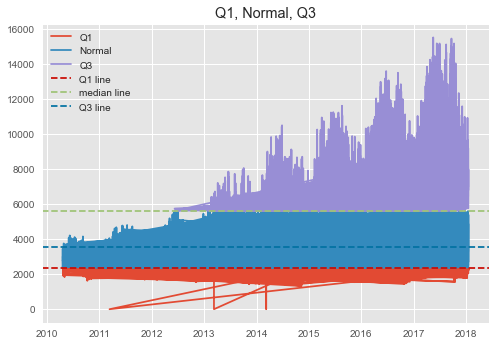

In [54]:
plt.title('Q1, Normal, Q3')
plt.plot(low['TOTAL'], label='Q1')
plt.plot(normal['TOTAL'], label='Normal')
plt.plot(high['TOTAL'], label='Q3')
plt.axhline(np.quantile(df['TOTAL'], 0.2), color='r', linestyle='--', label='Q1 line')
plt.axhline(np.quantile(df['TOTAL'], 0.8), color='g', linestyle='--', label='median line')
plt.axhline(np.quantile(df['TOTAL'], 0.5), color='b', linestyle='--', label='Q3 line')
plt.legend();

In [27]:
newdf = df.loc[df['TIMESTAMP'] > '2013-05-29 00:00:00']

In [28]:
newanalysis = newdf
newanalysis = newanalysis.set_index('TIMESTAMP')

In [29]:
newanalysis['SOLAR'] = np.log(newanalysis['SOLAR'])
newanalysis['BIOMASS'] = np.log(newanalysis['BIOMASS'])
newanalysis['GEOTHERMAL'] = np.log(newanalysis['GEOTHERMAL'])
newanalysis['SMALL HYDRO'] = np.log(newanalysis['SMALL HYDRO'])
newanalysis['SOLAR THERMAL'] = np.log(newanalysis['SOLAR THERMAL'])
newanalysis['SOLAR PV'] = np.log(newanalysis['SOLAR PV'])
newanalysis['WIND TOTAL'] = np.log(newanalysis['WIND TOTAL'])
newanalysis['BIOGAS'] = np.log(newanalysis['BIOGAS'])

/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Semakin terlihat kalau Solar PV seiring jalannya tahun semakin meningkat.

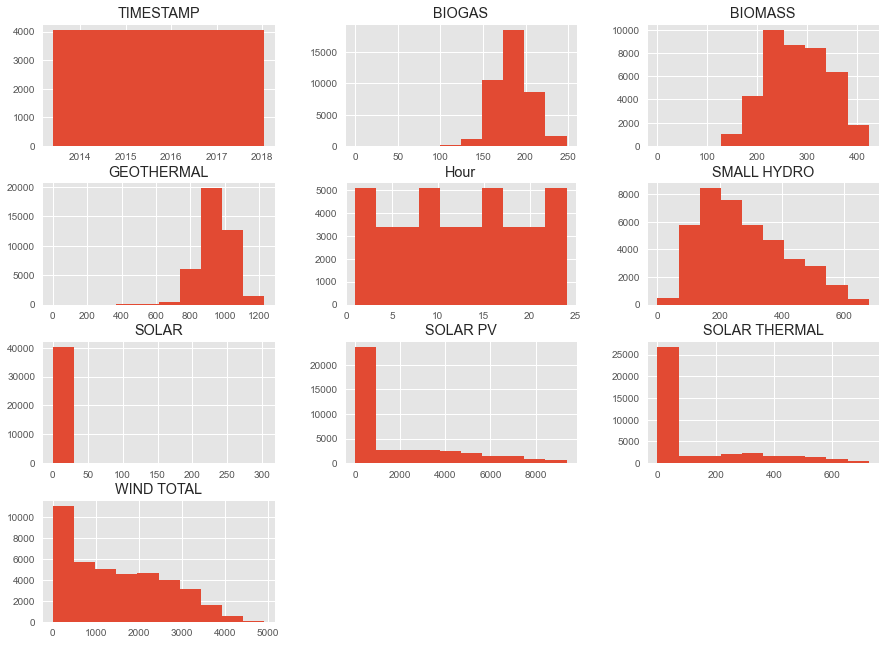

In [30]:
newdf.hist(layout=(4,3), figsize=(15,11));

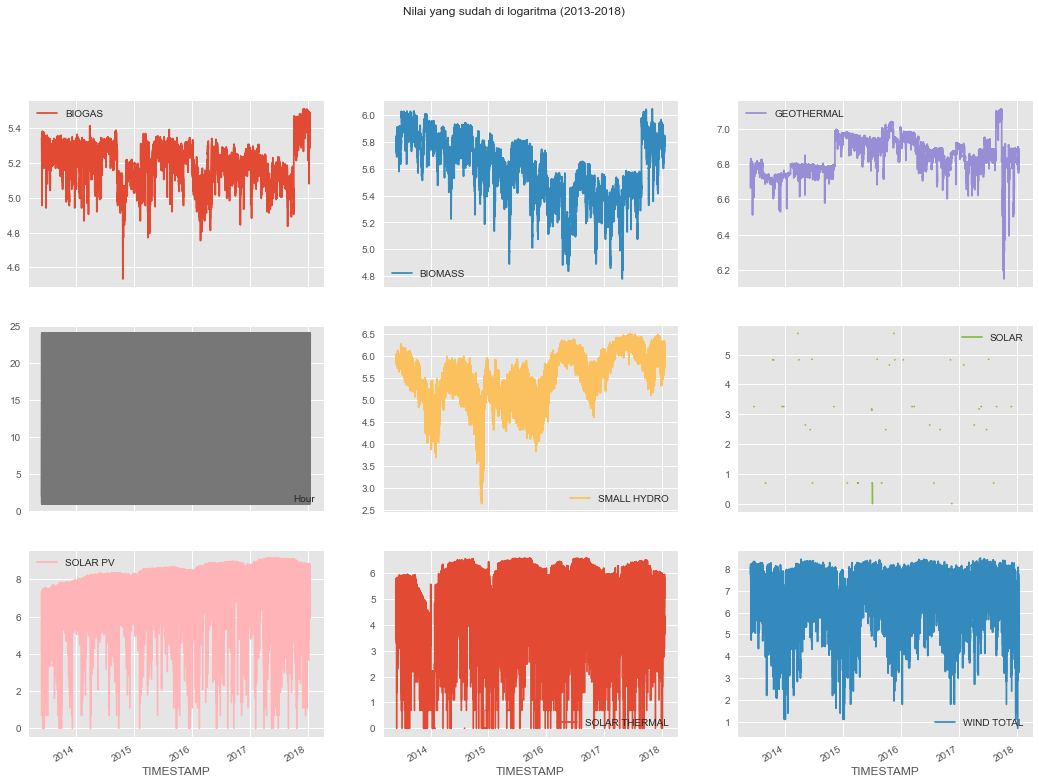

In [31]:
newanalysis.plot(subplots=True, layout=(3,3), figsize=(18,13), title='Nilai yang sudah di logaritma (2013-2018)');

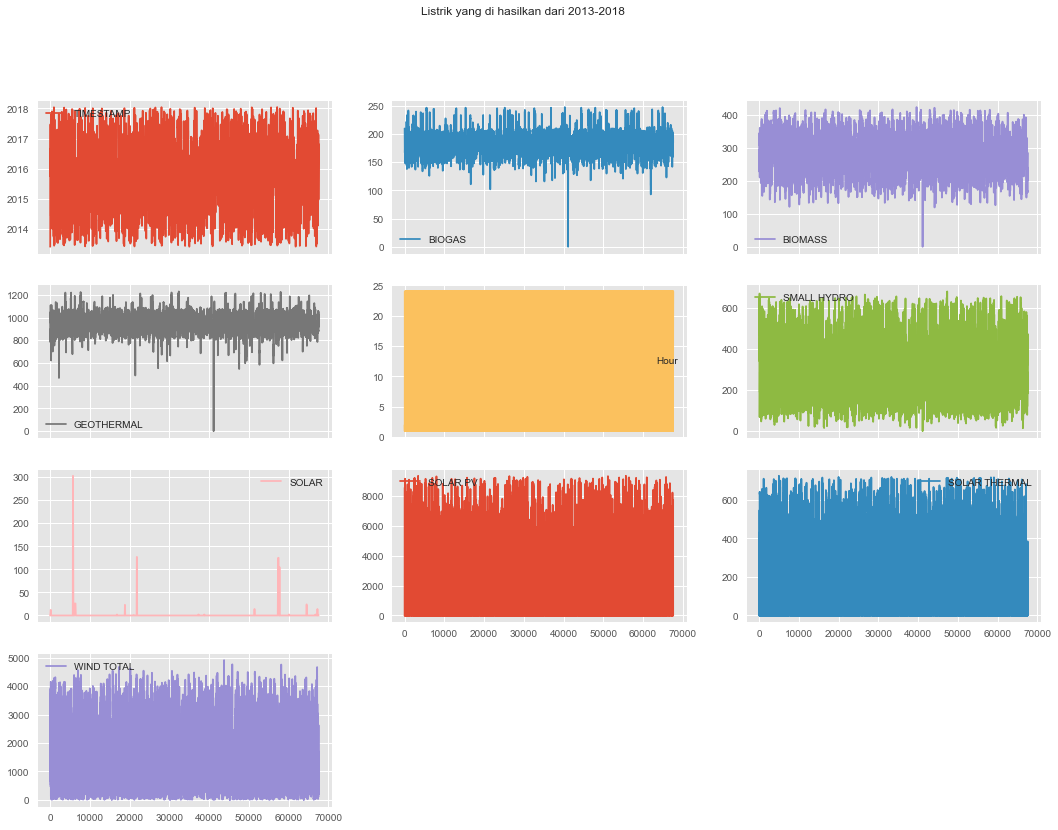

In [32]:
newdf.plot(subplots=True, layout=(4,3), figsize=(18,13), title='Listrik yang di hasilkan dari 2013-2018');

### Secara keseluruhan, Wind Total memang memiliki nilai tertinggi, namun dari scatter di atas, Solar Photovoltaic terlihat tidak stabil (kadang bisa menghasilkan nilai yang tinggi, kadang tidak).

### Dari kedua figur, terlihat kalau standar deviasi dari Solar PV cenderung lebih tinggi dibanding dengan Wind Total.

# KMeans :
- KMeans di sini digunakan mengelompokkan nilai terendah sampai tertinggi (gambar di bawah).
- KMeans akan membantu kita mengidentifikasi sektor mana yang menghasilkan nilai tertinggi berdasarkan tahun.

In [33]:
del newdf['SOLAR'] # men-delete kolom solar karena sektor cahaya/matahari sudah mulai beralih ke Solar PV dan Thermal dari 2013.

In [34]:
newdf = newdf.set_index('TIMESTAMP')

In [35]:
pca = PCA(1)
pca.fit(newdf)
X1D = pca.transform(newdf)

In [36]:
kmeans = KMeans(random_state= 0, n_clusters=4)
kmeans.fit(X1D)

KMeans(n_clusters=4, random_state=0)

In [37]:
kmlabel= kmeans.labels_

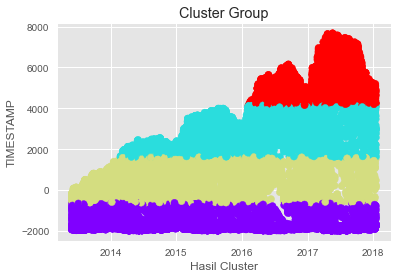

In [38]:
plt.figure(figsize=(6,4))
plt.scatter(newdf.index, X1D, c=kmlabel, cmap='rainbow')
plt.xlabel('Hasil Cluster')
plt.ylabel('TIMESTAMP')
plt.title('Cluster Group');

In [39]:
print("KMeans Silhouette Score : ", silhouette_score(X1D, kmlabel))

KMeans Silhouette Score :  0.7470179231096173


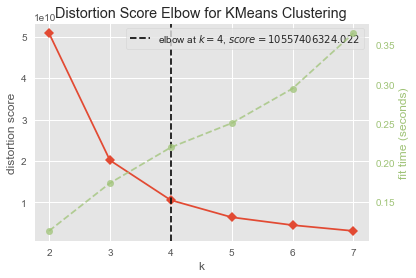

In [40]:
plt.figure(figsize=(6,4))
viz = KElbowVisualizer(kmeans, k=(2,8))
viz.fit(X1D)
viz.show();

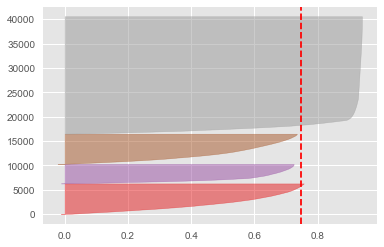

In [41]:
plt.figure(figsize=(6,4))
viskm = SilhouetteVisualizer(KMeans(4), color='yellowbrick')
viskm.fit(X1D);

In [42]:
newdf['Cluster Labels'] = kmlabel

In [43]:
clust0 = newdf.loc[newdf['Cluster Labels'] == 0]
clust1 = newdf.loc[newdf['Cluster Labels'] == 1]
clust2 = newdf.loc[newdf['Cluster Labels'] == 2]
clust3 = newdf.loc[newdf['Cluster Labels'] == 3]

In [44]:
print("Cluster kelompok ke-1 : ")
print("Mean :\n", clust0.mean())
print("Variance :\n", clust0.var().round(1))

Cluster kelompok ke-1 : 
Mean :
 BIOGAS             186.225580
BIOMASS            280.934852
GEOTHERMAL         951.047786
Hour                12.127403
SMALL HYDRO        270.827002
SOLAR PV            80.784672
SOLAR THERMAL        6.966682
WIND TOTAL        1623.494977
Cluster Labels       0.000000
dtype: float64
Variance :
 BIOGAS                401.9
BIOMASS              3764.2
GEOTHERMAL           8761.1
Hour                   74.0
SMALL HYDRO         19212.5
SOLAR PV            53437.9
SOLAR THERMAL        1265.5
WIND TOTAL        1343504.4
Cluster Labels          0.0
dtype: float64


# Cluster pertama :
- Angin tertinggi namun sangat fluktuatif.
- Sektor solar (Solar PV dan Solar Thermal) terendah.

In [45]:
print("Cluster kelompok ke-2 : ")
print("Mean :\n", clust1.mean())
print("Variance :\n", clust1.var().round(1))

Cluster kelompok ke-2 : 
Mean :
 BIOGAS             183.796263
BIOMASS            271.476479
GEOTHERMAL         971.162432
Hour                13.037207
SMALL HYDRO        252.973447
SOLAR PV          4515.062449
SOLAR THERMAL      356.786265
WIND TOTAL        1274.655794
Cluster Labels       1.000000
dtype: float64
Variance :
 BIOGAS                406.8
BIOMASS              2738.1
GEOTHERMAL           6684.2
Hour                    7.2
SMALL HYDRO         15685.5
SOLAR PV           522110.6
SOLAR THERMAL       40937.1
WIND TOTAL        1108469.3
Cluster Labels          0.0
dtype: float64


# Cluster kedua :
- Terlihat kalau Solar PV mulai meningkat.
- Varians dari Solar PV dan Angin sangat tinggi.

In [46]:
print("Cluster kelompok ke-3 : ")
print("Mean :\n", clust2.mean())
print("Variance :\n", clust2.var().round(1))

Cluster kelompok ke-3 : 
Mean :
 BIOGAS             185.840000
BIOMASS            301.687087
GEOTHERMAL         924.294646
Hour                13.001575
SMALL HYDRO        260.119843
SOLAR PV          2250.349764
SOLAR THERMAL      169.066142
WIND TOTAL        1307.514173
Cluster Labels       2.000000
dtype: float64
Variance :
 BIOGAS                352.8
BIOMASS              3446.9
GEOTHERMAL           8448.6
Hour                   12.8
SMALL HYDRO         15137.2
SOLAR PV           413203.8
SOLAR THERMAL       24317.2
WIND TOTAL        1130172.0
Cluster Labels          0.0
dtype: float64


# Cluster ketiga :
- Varians dari angin tetap tinggi.
- Angin mulai menurun, Solar PV menghasilkan listrik tertinggi.
- Varians dari Solar PV meningkat.

In [47]:
print("Cluster kelompok ke-4 : ")
print("Mean :\n", clust3.mean())
print("Variance :\n", clust3.var().round(1))

Cluster kelompok ke-4 : 
Mean :
 BIOGAS             178.703344
BIOMASS            252.765892
GEOTHERMAL         946.918050
Hour                13.154200
SMALL HYDRO        390.086546
SOLAR PV          7319.628798
SOLAR THERMAL      412.239214
WIND TOTAL        1277.048251
Cluster Labels       3.000000
dtype: float64
Variance :
 BIOGAS                443.2
BIOMASS              3192.8
GEOTHERMAL           8932.5
Hour                    5.1
SMALL HYDRO         11627.9
SOLAR PV           861820.6
SOLAR THERMAL       26857.7
WIND TOTAL        1157962.6
Cluster Labels          0.0
dtype: float64


# Cluster keempat :
- Solar PV meningkat lagi, namun varians juga meningkat.
- Angin menetap di angka 1000 (secara rata-rata), varians juga masih sangat tinggi.

In [48]:
# plt.figure(figsize=(12,5))
# plt.title('Cluster Labels')
# sns.scatterplot(data=newdf, x=newdf.index, y='TOTAL', 
#                 hue='Cluster Labels', palette=['red', 'blue', 'lawngreen', 'deeppink']);

# Hypothesis Testing dengan Dickey-Fuller Test apakah data sudah stasioner:
- H1 : time-series sudah stasioner.
- H0 : time-series belum stasioner.

In [49]:
newdf.sort_index(inplace=True)

In [50]:
newdf['TOTAL'] = newdf['BIOGAS'] + newdf['BIOMASS'] + newdf['GEOTHERMAL'] + newdf['SMALL HYDRO'] + newdf['SOLAR PV'] + newdf['SOLAR THERMAL'] + newdf['WIND TOTAL']

Nge-cek grup clustering tadi.

In [51]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [52]:
test_stationarity(newdf['TOTAL'])

Results of Dickey-Fuller Test:
Test Statistic                -9.233982e+00
p-value                        1.649346e-15
#Lags Used                     5.200000e+01
Number of Observations Used    4.050600e+04
Critical Value (1%)           -3.430511e+00
Critical Value (5%)           -2.861611e+00
Critical Value (10%)          -2.566808e+00
dtype: float64


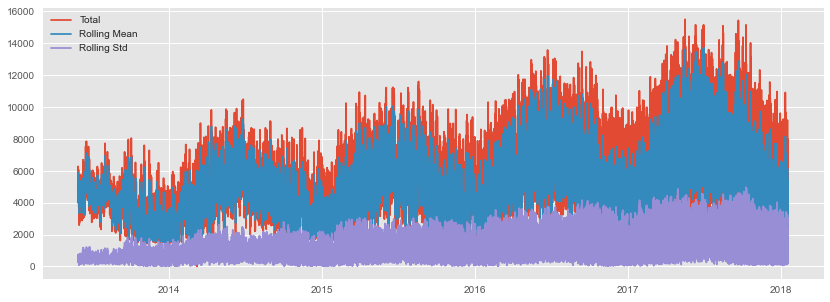

In [53]:
plt.figure(figsize=(14,5))
plt.plot(newdf['TOTAL'], label='Total')
plt.plot(newdf['TOTAL'].rolling(12).mean(), label='Rolling Mean')
plt.plot(newdf['TOTAL'].rolling(12).std(), label='Rolling Std')
plt.legend();

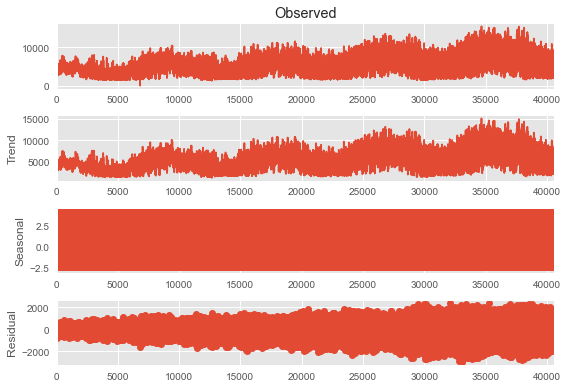

In [54]:
add = seasonal_decompose(newdf['TOTAL'].values, period=7, model='additive')
fig= add.plot()

In [55]:
std = newdf['TOTAL'].std()
mean = newdf['TOTAL'].mean()

In [56]:
lognorm = 1 / (std*newdf['TOTAL']*np.sqrt(2*np.pi)) * np.exp(-1/2*(np.log(newdf['TOTAL'])/std)**2)
#rumus di ambil dari wikipedia, scipy error karena nilai tidak boleh 0 (di scipy).

/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Dikarenakan dunia sektor energi sangat di pengaruhi oleh varians nya (di karenakan faktor cuaca, temperatur, dll), akan digunakan logaritma untuk melihat distribusi per-tahunannya.

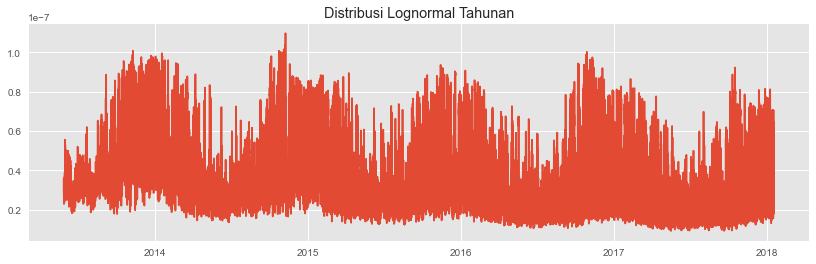

In [57]:
plt.figure(figsize=(14,4))
plt.title('Distribusi Lognormal Tahunan')
plt.plot(lognorm);

In [58]:
data = data.set_index('Hour')

In [59]:
data['TOTAL'] = data['BIOGAS'] + data['BIOMASS'] + data['GEOTHERMAL'] + data['SMALL HYDRO'] + data['SOLAR PV'] + data['SOLAR THERMAL'] + data['WIND TOTAL']

In [60]:
data.sort_index(inplace=True)

In [61]:
std1 = data['TOTAL'].std()
mean1 = data['TOTAL'].mean()

In [62]:
lognormhour = 1 / (std1*data['TOTAL']*np.sqrt(2*np.pi)) * np.exp(-1/2*(np.log(data['TOTAL'])/std1)**2)

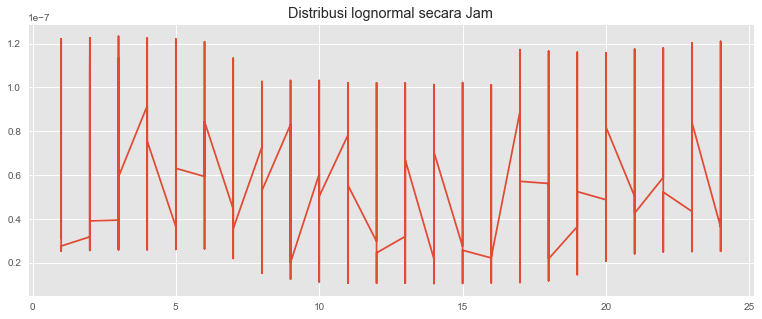

In [63]:
plt.figure(figsize=(13,5))
plt.title('Distribusi lognormal secara Jam')
plt.plot(lognormhour);

### Di antara jam  8 - jam 4 sore energi yang di generasikan mulai menurun.

# Mengecek outlier :

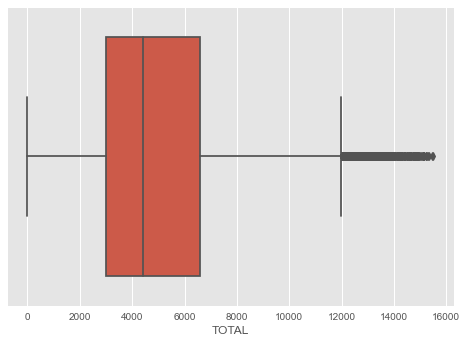

In [64]:
sns.boxplot(data=newdf, x='TOTAL');

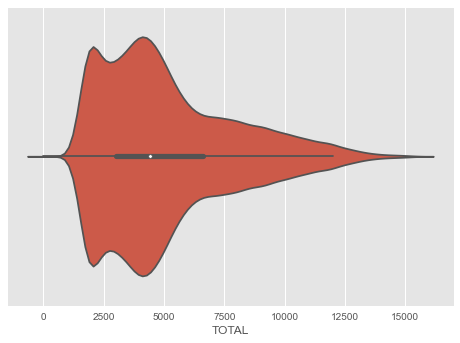

In [65]:
sns.violinplot(data=newdf, x='TOTAL');

# Hasil Dickey-Fuller Test :
- H1 berhasil di terima, yang berarti data sudah stasioner.

# Mempersiapkan data untuk model :
60 : 20 : 20 (train:validation:test)

In [66]:
dfs = newdf
dfs = dfs[['TOTAL']]

## Penjelasan :
- t-1 : y-1 baris,
- t-2 : y-2 baris,
- t-3 : y-3 baris

In [67]:
dfs['t-1'] = dfs.shift(1)
dfs['t-2'] = dfs['t-1'].shift(1)
dfs['t-3'] = dfs['t-2'].shift(1)
dfs = dfs.dropna()

<ipython-input-67-0fe41efbe82e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['t-1'] = dfs.shift(1)
<ipython-input-67-0fe41efbe82e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['t-2'] = dfs['t-1'].shift(1)
<ipython-input-67-0fe41efbe82e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [68]:
dfs = dfs.reset_index()
dfs.sort_index(inplace=True)
del dfs['TIMESTAMP']

In [69]:
train = dfs.loc[dfs.index <= 24330]

In [70]:
valid = dfs.loc[(dfs.index >= 24331) & (dfs.index < 32441)]

In [71]:
test = dfs.loc[(dfs.index >= 32441)]

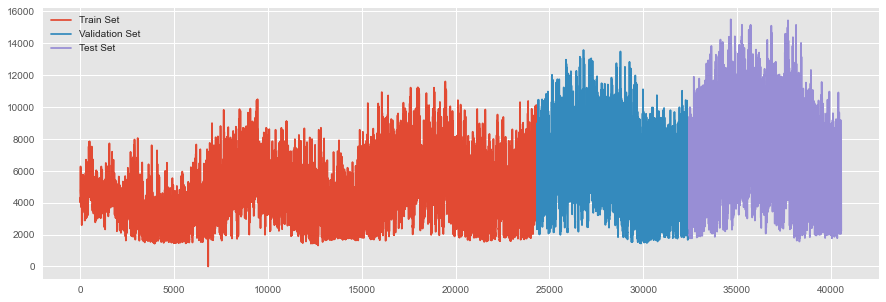

In [72]:
plt.figure(figsize=(15,5))
plt.plot(train['TOTAL'], label= 'Train Set')
plt.plot(valid['TOTAL'], label= 'Validation Set')
plt.plot(test['TOTAL'], label= 'Test Set')
plt.legend();

In [73]:
X_train = train.iloc[:,[1,2,3]]
y_train = train.iloc[:,0]

In [74]:
X_val = valid.iloc[:,[1,2,3]]
y_val = valid.iloc[:,0]

In [75]:
X_test = test.iloc[:,[1,2,3]]
y_test = test.iloc[:,0]

# Modelling :

# Tujuan dari modelling :
- Mem-forecast berapa keseluruhan listrik yang dihasilkan berdasarkan seiring jalannya waktu dengan data yang ada.

# Pemilihan Model :
- Untuk pemilihan model, ada 2 model yang di gunakan :
    1. Random Forest
    2. ARMA

# Sifat dari data :
- Fluktuatif (dalam kata lain varians nya tinggi)
- Data yang fluktuatif menyebabkan outlier tersebar banyak.

# Kenapa 2 model ini ?
Random Forest :
- Random Forest memiliki kemampuan untuk menurunkan/menstabilkan varians dari fitur (bagging).
- Dilihat dari boxplot/violinplot di atas, ada sangat banyak outlier yang berada di data, dimana Random Forest robust terhadap outlier (kalau dibandingkan dengan machine learning lainnya).

ARMA :
- ARMA merupakan kombinasi dari 2 algoritma statistik AR(AutoRegressive) dan MA(Moving Average).
- AR merupakan algoritma statistik yang melihat nilai observasi dari segi perubahan (kenaikan/penurunan) data tersebut.
- MA merupakan algoirtma statistik yang mengobservasi secara rata-rata.

In [76]:
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve, learning_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# Random Forest :

## Penjelasan preprocessing dari pipeline:
- Power Transformer : membuat varians menjadi konstan.
- MinMaxScaler : normalisasi fitur menjadi jarak lebih kecil.
cth : 

X = [100,500,0]
di minmaxscaler -> X= [1,0.5,0]

## Parameter :
- n estimators : jumlah pohon
- max depth : kedalaman pohon
- ccp alpha : cost complexity dari alpha, alpha di sini merupakan fungsi untuk mencari akar terbaik. Namun jika terlalu tinggi, maka besar kemungkinan untuk overfit.

In [77]:
rf = make_pipeline(MinMaxScaler(feature_range=(0,1)), PowerTransformer(), RandomForestRegressor(criterion='mse', random_state=42))

param_rf = {
    'randomforestregressor__n_estimators' : [175],
    'randomforestregressor__max_depth' : [9],
    'randomforestregressor__ccp_alpha' : [1.3]
}
CV_rf = GridSearchCV(estimator= rf , param_grid= param_rf, scoring='neg_mean_squared_error', cv=5)

CV_rf.fit(X_train, y_train)
rf_best = CV_rf.best_estimator_
rf_pred = CV_rf.predict(X_test)

In [78]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("MAPE : ", mean_absolute_percentage_error(y_test,rf_pred))
print("R2 Score : ", r2_score(y_test, rf_pred))
print("Best params : ", rf_best)

RMSE :  1053.1781359238698
MAPE :  0.09594909789214141
R2 Score :  0.9144660216602282
Best params :  Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('powertransformer', PowerTransformer()),
                ('randomforestregressor',
                 RandomForestRegressor(ccp_alpha=1.3, max_depth=9,
                                       n_estimators=175, random_state=42))])


In [79]:
rf_best

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('powertransformer', PowerTransformer()),
                ('randomforestregressor',
                 RandomForestRegressor(ccp_alpha=1.3, max_depth=9,
                                       n_estimators=175, random_state=42))])

In [80]:
print(cross_val_score(rf_best, X_train, y_train, cv= 5, scoring='r2').mean())
print(cross_val_score(rf_best, X_val, y_val, cv= 5, scoring='r2').mean())
print(cross_val_score(rf_best, X_test, y_test, cv= 5, scoring='r2').mean())

0.9601681183205834
0.9596829114473568
0.9672878112845478


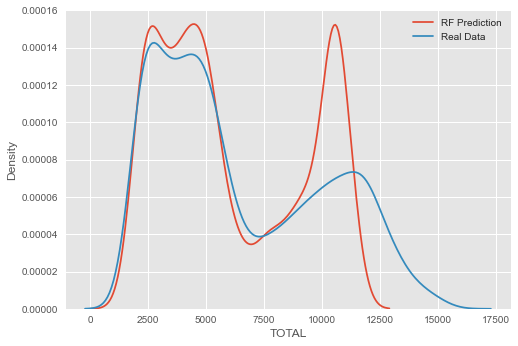

In [81]:
sns.kdeplot(rf_pred, label='RF Prediction')
sns.kdeplot(y_test, label='Real Data')
plt.legend();

# ARMA :

## PACF dan ACF :
- Di gunakan untuk mencari korelasi antar time-series.
- PACF digunakan untuk mengindikasikan p(auto-regressive).
- ACF digunakan untuk mengindikasikan q(moving-average).

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

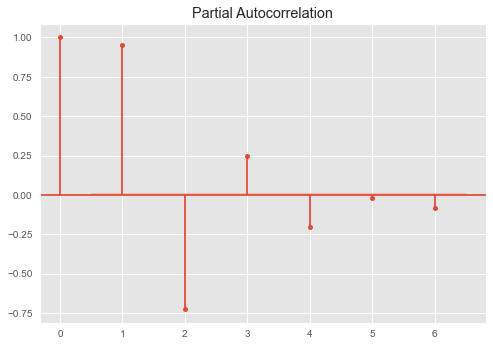

In [83]:
plot_pacf(newdf['TOTAL'], lags=6);

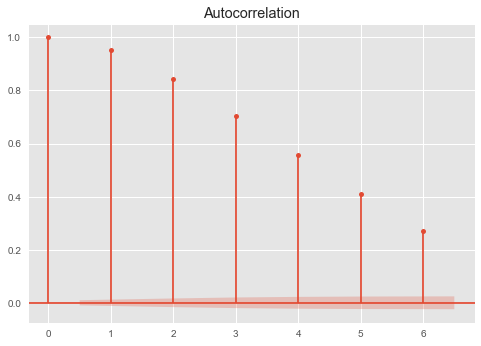

In [84]:
plot_acf(newdf['TOTAL'], lags=6);

# Hasil dari PACF & ACF :
- Output dari dickey-fuller test menggunakan lags sebanyak 5.2, maka kita membulatkan angka tersebut menjadi 6.
- PACF : terjadi penyilangan terbesar ke bawah saat di nilai 2, yang berarti mengindikasikan kalau AR yang bagus untuk digunakan merupakan 2.
- ACF : tidak ada terjadi penyilangan.

## Dari sini, akan di gunakan Auto Regressive.
### parameter dari ARMA :

order= p, q
- p merupakan Auto Regressive
- q merupakan Moving Average

# AutoRegressive :

In [85]:
from statsmodels.tsa.arima_model import ARMA

In [86]:
dat = newdf[['TOTAL']]

In [87]:
model_ar = ARMA(dat, order=(2,0))
res_AR = model_ar.fit()

/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has

In [88]:
AR_pred = res_AR.predict(start=('2013-05-29 01:00:00'), end= ('2018-01-16 23:00:00'))

In [89]:
res_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  TOTAL   No. Observations:                40559
Model:                     ARMA(2, 0)   Log Likelihood             -315358.938
Method:                       css-mle   S.D. of innovations            576.126
Date:                Sun, 26 Sep 2021   AIC                         630725.876
Time:                        09:46:53   BIC                         630760.318
Sample:                             0   HQIC                        630736.771
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5091.3479     35.295    144.253      0.000    5022.172    5160.524
ar.L1.TOTAL     1.6449      0.003    481.735      0.000       1.638       1.652
ar.L2.TOTAL    -0.7260      0.003   -212.605      0.000      -0.733      -0.719
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1329           -0.3066j            1.1737           -0.0421
AR.2            1.1329           +0.3066j            1.1737            0.0421
-----------------------------------------------------------------------------
"""

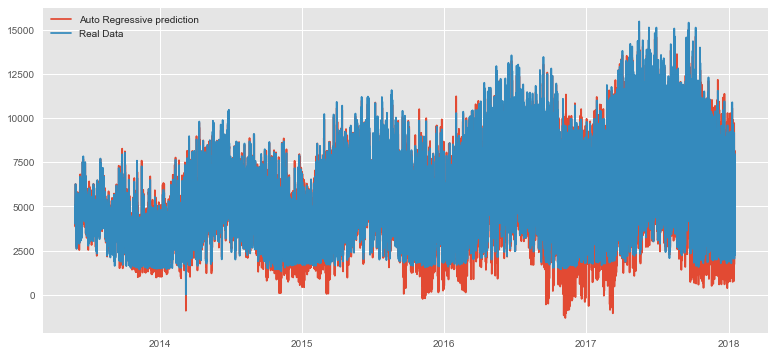

In [90]:
plt.figure(figsize=(13,6))
plt.plot(AR_pred, label='Auto Regressive prediction')
plt.plot(dat, label='Real Data')
plt.legend();

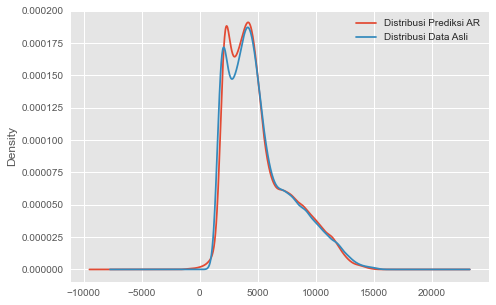

In [91]:
plt.figure(figsize=(7.5,5))
res_AR.fittedvalues.plot.kde(label='Distribusi Prediksi AR')
dat['TOTAL'].plot.kde(label='Distribusi Data Asli');
plt.legend();

In [92]:
forecast = res_AR.forecast(5)

# Model Evaluation :

In [93]:
res = newdf[['TOTAL', 'Cluster Labels']]
res['AR Prediction'] = AR_pred
res = res.reset_index()
res = res.loc[(res.index >= 32444)]

<ipython-input-93-5114c9971ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['AR Prediction'] = AR_pred


In [94]:
res['Random Forest Predict'] = rf_pred
res = res.set_index('TIMESTAMP')

# Statistik Deskriptif :
- Dari segi mean maupun median, AR jauh lebih berdekatan dibanding dengan Random Forest.
- AR juga mampu mendekati nilai tertinggi secara dekat dengan y asli.
- AR hanya salah jauh di min(nilai terendah), dimana AR memprediksi -

In [95]:
res.describe().transpose()

count         mean          std          min  \
TOTAL                  8115.0  6465.540111  3601.299650  1563.000000   
Cluster Labels         8115.0     1.082563     1.321626     0.000000   
AR Prediction          8115.0  6354.173350  3556.539720 -1063.272085   
Random Forest Predict  8115.0  6126.456814  3141.646655  1578.101943   

                               25%          50%          75%          max  
TOTAL                  3418.000000  5220.000000  9804.500000  15501.00000  
Cluster Labels            0.000000     0.000000     3.000000      3.00000  
AR Prediction          3344.843480  5040.020127  9826.130040  15063.13776  
Random Forest Predict  3427.374919  5075.478829  9509.567414  11350.64872

# Cluster labels

- Salah satu fungsi cluster K-Means di sini adalah untuk melihat/memastikan si model secara visual, apakah prediksi model mirip dengan data asli. (alias akurat)

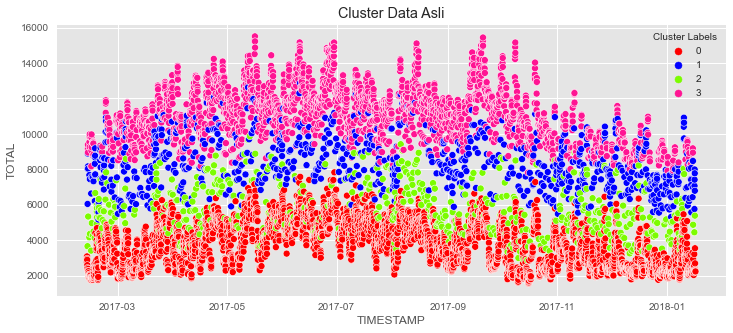

In [96]:
plt.figure(figsize=(12,5))
plt.title('Cluster Data Asli')
sns.scatterplot(data=res, x=res.index, y='TOTAL', hue='Cluster Labels', palette=['red', 'blue', 'lawngreen', 'deeppink']);

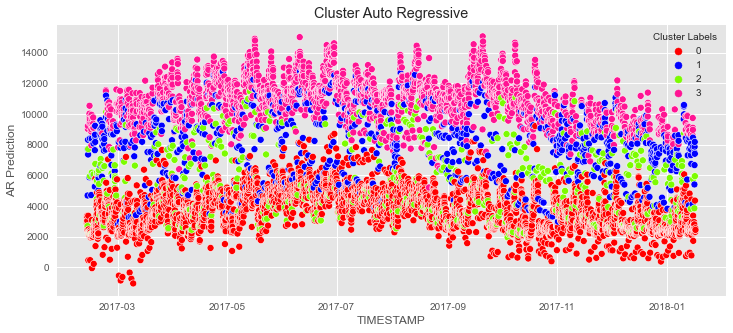

In [97]:
plt.figure(figsize=(12,5))
plt.title('Cluster Auto Regressive')
sns.scatterplot(data=res,x=res.index, y='AR Prediction', hue='Cluster Labels', palette=['red', 'blue', 'lawngreen', 'deeppink']);

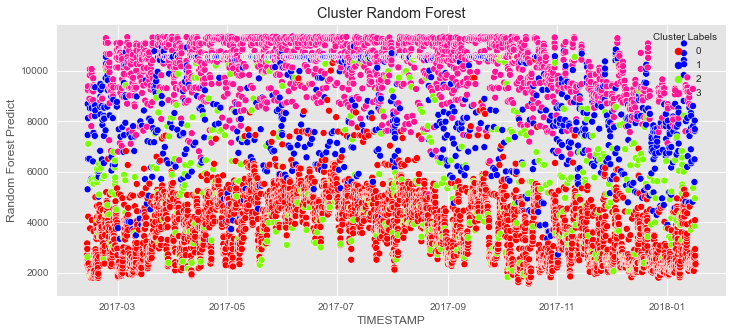

In [98]:
plt.figure(figsize=(12,5))
plt.title('Cluster Random Forest')
sns.scatterplot(data=res,x=res.index, y='Random Forest Predict', hue='Cluster Labels', palette=['red', 'blue', 'lawngreen', 'deeppink']);

- Terlihat kalau Random Forest sangat tidak berurutan dan scatter berlari kemana-mana.
- Scatter dari Auto Regressive jauh lebih rapi dan lebih mirip dengan data asli, mengartikan kalau Auto Regressive lebih akurat.

# Scoring & Error :
- Dari RMSE mau pun skoring R2, AutoRegressive lebih unggul.

In [99]:
print("RMSE Random Forest : ", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score Random Forest : ", r2_score(y_test, rf_pred))

RMSE Random Forest :  1053.1781359238698
R2 Score Random Forest :  0.9144660216602282


In [100]:
print("RMSE ARMA : ", np.sqrt(mean_squared_error(y_test, res['AR Prediction'])))
print("R2 Score ARMA : ", r2_score(y_test, res['AR Prediction']))

RMSE ARMA :  791.5921503881195
R2 Score ARMA :  0.9516787721512495


### Dari hasil evaluasi model, bisa diputuskan untuk menggunakan ARMA.

# Forecast :

### Pemilihan params untuk forecast :

In [101]:
frc, srr, confint = res_AR.forecast(100)

Forecast ARMA memiliki 3 statement ;
- forecast : hasil yang di forecast
- stderr : nilai standard error dari forecast.
- CI : nilai Confidence Interval dari hasil forecast.

note : CI nya 95% (alpha = 0.05 secara default)

### Jika garis sudah mulai lurus terus-menerus (tidak ada nya pergerakan naik turun), mengartikan kalau forecast sudah tidak valid lagi.

In [102]:
forecast, stderr, confint = res_AR.forecast(20)

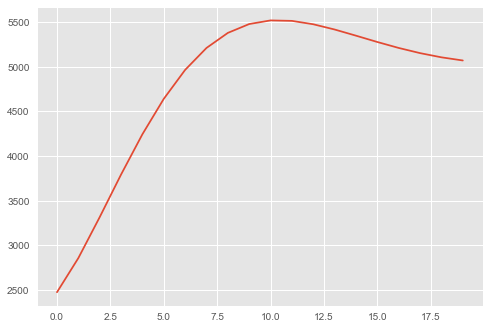

In [103]:
plt.plot(forecast);

In [104]:
# import pickle

In [106]:
# pickle.dump(model_ar, open('model_AR.pkl', 'wb'))